In [1]:
import numpy as np
import matplotlib.pyplot as matplt


# Default values
# define the parameters for the simulation
# x(t) = cos(2*π*ft + φ)
# f = 10 # frequency of continuous time sinusoid x(t)
# phi = np.pi/5 # phase (φ) for x(t)
# f_s = 12 # sampling rate for x[n]

In [2]:
# define the parameters for the simulation
# x(t) = cos(2*pi*f*t + phi)
f = 10; # frequency of continuous time sinusoid x(t)
phi = np.pi/5 # phase for x(t)
f_s = 12 # sampling rate for x[n]
fs_t = f_s*1000; # sampling rate for x(t) >> f_s to approximate x(t) as continuous time
t = np.arange(0,4/f,1/fs_t) # define continuous time variable

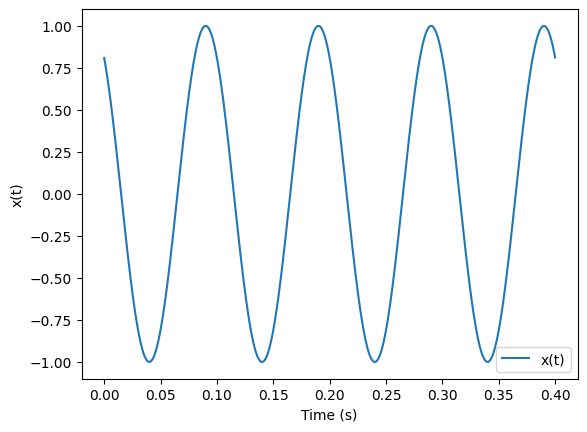

In [3]:
x_t = np.cos(2*np.pi*f*t + phi)
fig1, ax1=matplt.subplots()
ax1.plot(t,x_t)

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("x(t)")
ax1.legend(['x(t)'], loc="lower right")

<class 'float'>


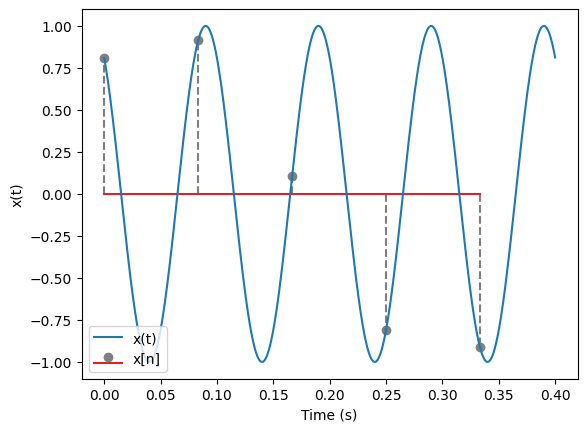

In [4]:
# 
n_samples = fs_t/f_s # sample period for x[n]
n_ = np.arange(0,len(x_t),np.int64(n_samples)); print(type(n_samples)) # discrete samples for x[n]
x_n = x_t[n_]; # x[n]

fig2, ax2=matplt.subplots()
ax2.stem(n_/fs_t, x_n, linefmt='C7--', markerfmt='C7o') # plot x[n]
ax2.plot(t,x_t) # plot x(t)

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("x(t)")
ax2.legend(['x(t)','x[n]'], loc="lower left")

In [6]:
w_hat = 2*np.pi*f/f_s # compute digital frequency

# find principle alias

if (f_s < 2*f):
    print('Nyquist sampling criteria not met, f_s <= 2*f')

    print('w_hat = ' + str(w_hat/np.pi))
    while (w_hat > np.pi):
        # alias or fold
        w_hat = w_hat - 2*np.pi

    if (w_hat > 0):
        print('Alias, phase unchanged')
        #print('phi unchanged')
        phi_recon=phi
        f_recon=w_hat*f_s/2/np.pi
    elif (w_hat < 0):
        print('Folding, phase change')
        #print('phase change')
        phi_recon=-1*phi
        f_recon=-1*w_hat*f_s/2/np.pi
    elif (w_hat == 0):
        print('w_hat = 0, dc')

print('principal alias for w_hat = ' + str(w_hat/np.pi))

Nyquist sampling criteria not met, f_s <= 2*f
w_hat = 1.6666666666666667
Folding, phase change
principal alias for w_hat = -0.33333333333333326


frequency in radians for positive w_hat and aliases for w_hat = [-2.33333333 -0.33333333  1.66666667]
frequency in radians for positive w_hat and aliases for w_hat = [-1.66666667  0.33333333  2.33333333]
complex amplitude for green lines: 0.5exp(-0.6283185307179586)
complex amplitude for grey lines: 0.5exp(0.6283185307179586)


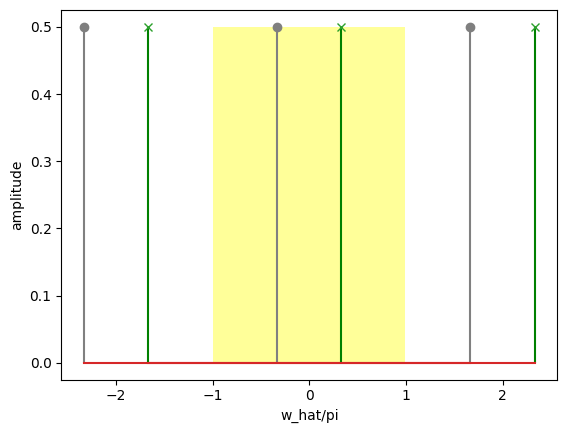

In [10]:
#print(phi_recon)
# plot spectrum for x[n]
pos_freq=np.array([w_hat-2*np.pi, w_hat, w_hat+2*np.pi])
print("frequency in radians for positive w_hat and aliases for w_hat = " + str(pos_freq/np.pi))
neg_freq=np.array([-1*w_hat-2*np.pi,-1*w_hat,-1*w_hat+2*np.pi])
print("frequency in radians for positive w_hat and aliases for w_hat = "  + str(neg_freq/np.pi))

fig4, ax4=matplt.subplots()
ax4.stem(pos_freq/np.pi, [0.5, 0.5, 0.5], 'grey', markerfmt='C7o')
ax4.stem(neg_freq/np.pi, [0.5, 0.5, 0.5], 'green', markerfmt='C2x')

ax_range=np.arange(-1,1,0.01)
ax4.fill_between(ax_range,0.5,where=ax_range>=-1, facecolor='yellow',alpha=0.4)
ax4.set_xlabel('w_hat/pi'); ax4.set_ylabel('amplitude')

if (w_hat < 0):
    phi_to_plot=phi_recon;

print('complex amplitude for green lines: ' + str(0.5) + 'exp(' + str(phi_to_plot) + ')')
print('complex amplitude for grey lines: ' + str(0.5) + 'exp(' + str(phi_to_plot*-1) + ')')



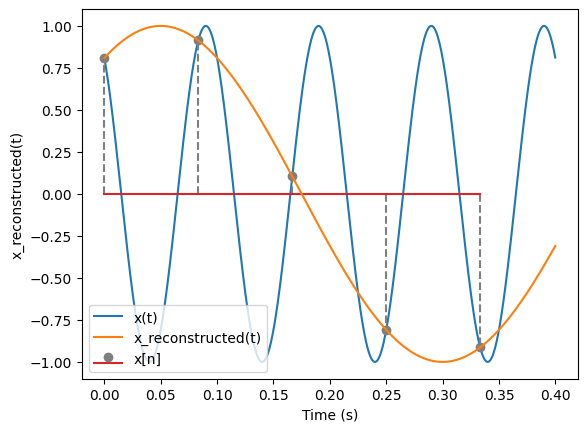

In [18]:
# plot x_reconstructed(t)
x_t_recon = np.cos(2*np.pi*f_recon*t + phi_recon)

fig3, ax3=matplt.subplots()
ax3.plot(t,x_t)
ax3.stem(n_/fs_t,x_n, linefmt='C7--', markerfmt='C7o')
ax3.plot(t,x_t_recon)

ax3.set_xlabel("Time (s)")
ax3.set_ylabel("x_reconstructed(t)")

ax3.legend(['x(t)','x_reconstructed(t)','x[n]'], loc="lower left")

In [ ]:
#w_hat = 2*pi*10/8 = 2.5*pi = 0.5*pi
#w_hat = 2*np.pi*f/f_s# - 2*np.pi
print(w_hat/np.pi)

#f_recon = 2;# f_recon = 0.5*pi*8/(2*pi) = 2 Hz; aliasing so no change of phase
f_recon = (w_hat*f_s/(2*np.pi))
print(f_recon)

1.6666666666666667
10.0


In [6]:
w_hat = 2*np.pi*f/f_s # compute digital frequency

# find principle alias

if (f_s < 2*f):
    print('Nyquist sampling criteria not met, f_s <= 2*f')

    print(w_hat/np.pi)
    while (w_hat > np.pi):
        # alias or fold
        w_hat = w_hat - 2*np.pi

print(w_hat/np.pi)

Nyquist sampling criteria not met, f_s <= 2*f
1.6666666666666667
-0.33333333333333326


[-2.33333333 -0.33333333  1.66666667]
[-1.66666667  0.33333333  2.33333333]
complex amplitude for green lines: 0.5exp(--0.6283185307179586)
complex amplitude for grey lines: 0.5exp(-0.6283185307179586)


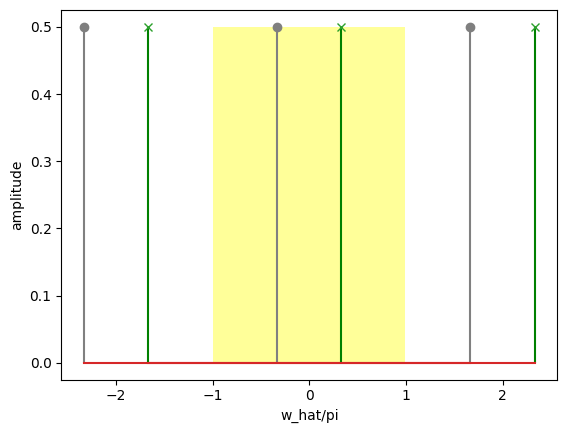

In [ ]:
# draw spectrum for x[n]
pos_freq=np.array([w_hat-2*np.pi, w_hat, w_hat+2*np.pi])
print(pos_freq/np.pi)
neg_freq=np.array([-1*w_hat-2*np.pi,-1*w_hat,-1*w_hat+2*np.pi])
print(neg_freq/np.pi)

fig4, ax4=matplt.subplots()
ax4.stem(pos_freq/np.pi, [0.5, 0.5, 0.5], 'grey', markerfmt='C7o')
ax4.stem(neg_freq/np.pi, [0.5, 0.5, 0.5], 'green', markerfmt='C2x')

ax_range=np.arange(-1,1,0.01)
ax4.fill_between(ax_range,0.5,where=ax_range>=-1, facecolor='yellow',alpha=0.4)
ax4.set_xlabel('w_hat/pi'); ax4.set_ylabel('amplitude')

if (w_hat < 0):
    phi_to_plot=phi*-1;

print('complex amplitude for green lines: ' + str(0.5) + 'exp(' + str(phi_to_plot) + ')')
print('complex amplitude for grey lines: ' + str(0.5) + 'exp(' + str(phi_to_plot) + ')')

In [8]:
w_hat = 2*np.pi*f/f_s # compute digital frequency

# find principle alias

if (f_s < 2*f):
    print('Nyquist sampling criteria not met, f_s <= 2*f')

    print(w_hat/np.pi)
    while (w_hat > np.pi):
        # alias or fold
        w_hat = w_hat - 2*np.pi

    if (w_hat > 0):
        print('Alias, phase unchanged')
        #print('phi unchanged')
        phi_recon=phi
        f_recon=w_hat*f_s/2/np.pi
    elif (w_hat < 0):
        print('Folding, phase change')
        #print('phase change')
        phi_recon=-1*phi
        f_recon=-1*w_hat*f_s/2/np.pi
    elif (w_hat == 0):
        print('w_hat = 0, dc')

print(w_hat/np.pi)

Nyquist sampling criteria not met, f_s <= 2*f
1.6666666666666667
Folding, phase change
-0.33333333333333326


[-2.33333333 -0.33333333  1.66666667]
[-1.66666667  0.33333333  2.33333333]
complex amplitude for green lines: 0.5exp(--0.6283185307179586)
complex amplitude for grey lines: 0.5exp(-0.6283185307179586)


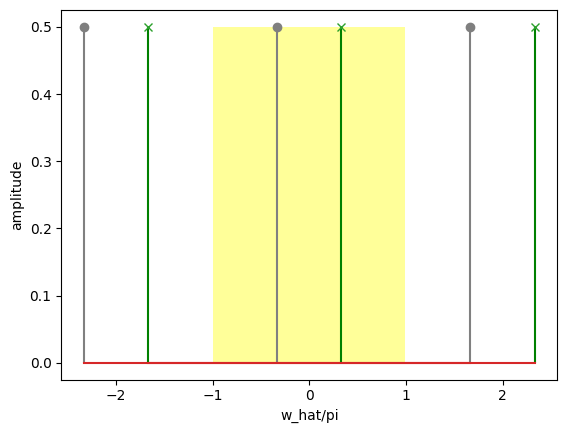

In [9]:
# draw spectrum for x[n]
pos_freq=np.array([w_hat-2*np.pi, w_hat, w_hat+2*np.pi])
print(pos_freq/np.pi)
neg_freq=np.array([-1*w_hat-2*np.pi,-1*w_hat,-1*w_hat+2*np.pi])
print(neg_freq/np.pi)

fig4, ax4=matplt.subplots()
ax4.stem(pos_freq/np.pi, [0.5, 0.5, 0.5], 'grey', markerfmt='C7o')
ax4.stem(neg_freq/np.pi, [0.5, 0.5, 0.5], 'green', markerfmt='C2x')

ax_range=np.arange(-1,1,0.01)
ax4.fill_between(ax_range,0.5,where=ax_range>=-1, facecolor='yellow',alpha=0.4)
ax4.set_xlabel('w_hat/pi'); ax4.set_ylabel('amplitude')

if (w_hat < 0):
    phi_to_plot=phi*-1;

print('complex amplitude for green lines: ' + str(0.5) + 'exp(-' + str(phi_to_plot) + ')')
print('complex amplitude for grey lines: ' + str(0.5) + 'exp(' + str(phi_to_plot) + ')')

In [ ]:
# plot x(t) reconstructed from x[n]
x_t_recon = np.cos(2*np.pi*f_recon*t + phi)

fig3, ax3=matplt.subplots()
ax3.plot(t,x_t_recon)

ax3.set_xlabel("Time (s)")
ax3.set_ylabel("x_recon(t)")

ax3.plot(t,x_t)

ax3.stem(n_/fs_t,x_n)
ax3.legend(['x(t)','x_reconstructed(t)','x[n]'], loc="lower left")

In [ ]:
# draw spectrum for x[n]
pos_freq=np.array([w_hat-2*np.pi, w_hat, w_hat+2*np.pi])
print(pos_freq/np.pi)
neg_freq=np.array([-1*w_hat-2*np.pi,-1*w_hat,-1*w_hat+2*np.pi])
print(neg_freq/np.pi)

fig4, ax4=matplt.subplots()
ax4.stem(pos_freq/np.pi, [0.5, 0.5, 0.5], 'grey', markerfmt='C7o')
ax4.stem(neg_freq/np.pi, [0.5, 0.5, 0.5], 'green', markerfmt='C2x')

ax_range=np.arange(-1,1,0.01)
ax4.fill_between(ax_range,0.5,where=ax_range>=-1, facecolor='yellow',alpha=0.4)
ax4.set_xlabel('w_hat/pi'); ax4.set_ylabel('amplitude')

if (w_hat < 0):
    phi_to_plot=phi*-1;

print('complex amplitude for green lines: ' + str(0.5) + 'exp(-' + str(phi_to_plot) + ')')
print('complex amplitude for grey lines: ' + str(0.5) + 'exp(' + str(phi_to_plot) + ')')

In [19]:
# 
if (w_hat > 0):
    print('Alias')
    print('phi unchanged')
    f_recon=w_hat*f_s/2/np.pi
elif (w_hat < 0):
    print('Folding')
    print('phase change')
    phi=-1*phi
    f_recon=-1*w_hat*f_s/2/np.pi
elif (w_hat == 0):
    print('w_hat = 0, dc')
    

Folding
phase change


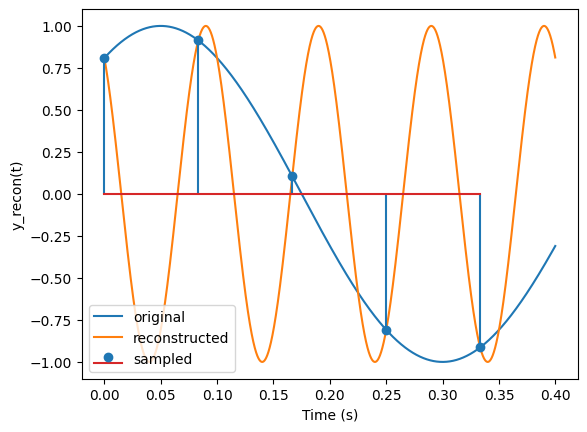

In [17]:
# reconstructed
#w_hat = 2*pi*10/8 = 2.5*pi = 0.5*pi
#w_hat = 2*np.pi*f/f_s - 2*np.pi
#f_recon = 2;# f_recon = 0.5*pi*8/(2*pi) = 2 Hz; aliasing so no change of phase
#f_recon = np.abs(w_hat*f_s/(2*np.pi))

#y_recon = np.sin(2*np.pi*f_recon*t + phi)
y_recon = np.cos(2*np.pi*f_recon*t + phi)
#y_recon = np.sin(2*np.pi*f_recon*t - phi)

fig3, ax3=matplt.subplots()
ax3.plot(t,y_recon)

ax3.set_xlabel("Time (s)")
ax3.set_ylabel("y_recon(t)")

ax3.plot(t,x_t)

#print(y_recon[0:5])
ax3.stem(n_/fs_t,x_n)
ax3.legend(['original','reconstructed','sampled'], loc="lower left")


[-2.33333333 -0.33333333  1.66666667]
[-1.66666667  0.33333333  2.33333333]
complex amplitude for green lines: 0.5exp(-0.6283185307179586)
complex amplitude for grey lines: 0.5exp(0.6283185307179586)


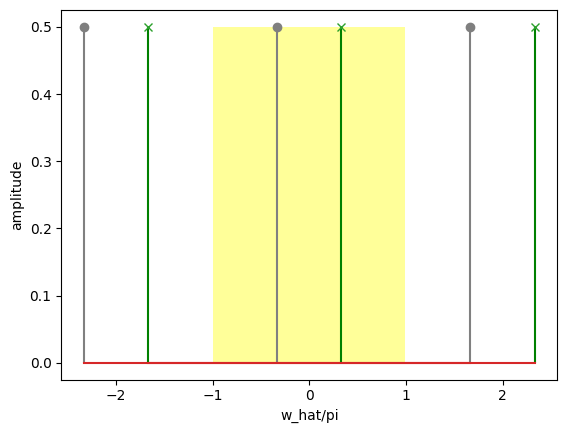

In [36]:
# draw spectrum
pos_freq=np.array([w_hat-2*np.pi, w_hat, w_hat+2*np.pi])
print(pos_freq/np.pi)
neg_freq=np.array([-1*w_hat-2*np.pi,-1*w_hat,-1*w_hat+2*np.pi])
print(neg_freq/np.pi)

fig4, ax4=matplt.subplots()
ax4.stem(pos_freq/np.pi, [0.5, 0.5, 0.5], 'grey', markerfmt='C7o')
ax4.stem(neg_freq/np.pi, [0.5, 0.5, 0.5], 'green', markerfmt='C2x')

#ax_range=np.arange(-np.pi,np.pi,0.1)
ax_range=np.arange(-1,1,0.01)
#ax4.fill_between(ax_range,0.5,where=ax_range>-np.pi, facecolor='yellow',alpha=0.4)
ax4.fill_between(ax_range,0.5,where=ax_range>=-1, facecolor='yellow',alpha=0.4)
ax4.set_xlabel('w_hat/pi'); ax4.set_ylabel('amplitude')

if (w_hat < 0):
    phi_to_plot=phi*-1;

print('complex amplitude for green lines: ' + str(0.5) + 'exp(-' + str(phi_to_plot) + ')')
print('complex amplitude for grey lines: ' + str(0.5) + 'exp(' + str(phi_to_plot) + ')')

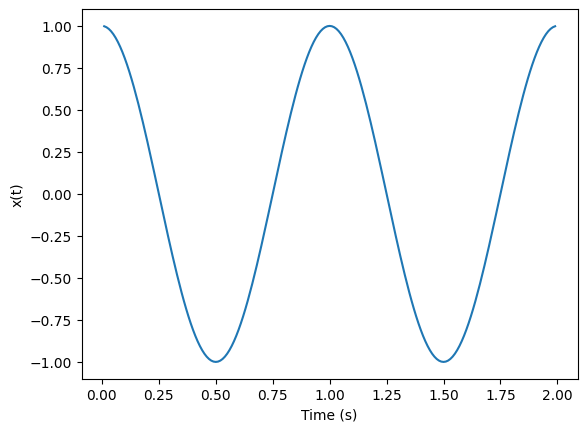

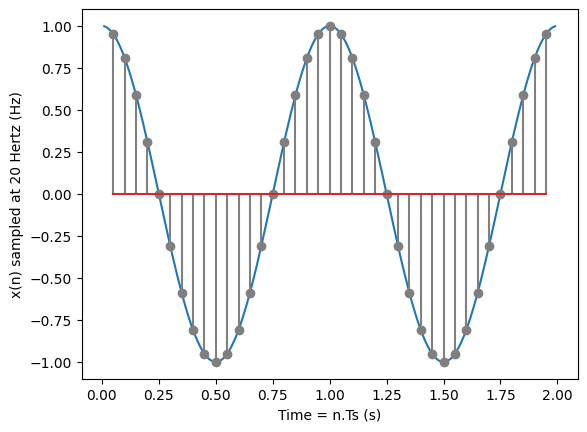

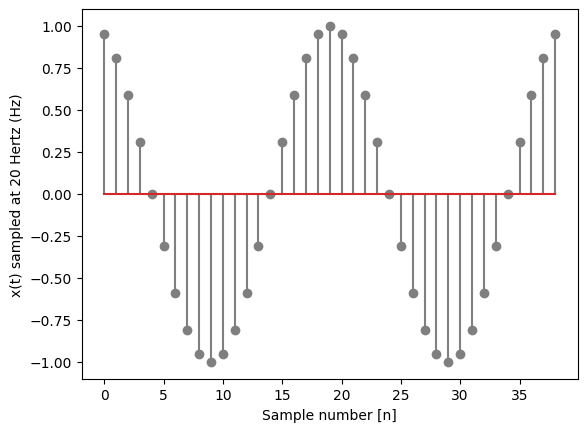

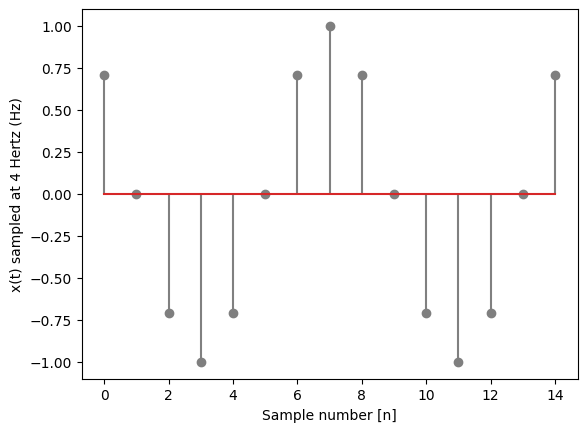

In [14]:
fs = 100; # sampling frequency
t = np.arange(1/fs,2,1/fs)
#print(len(t))
f = 1; phi = np.pi/2;
y = np.sin(2*np.pi*f*t + phi)
#print(y)
fig1, ax1=matplt.subplots()
ax1.plot(t,y)
#ax1.set_title("Axis 1")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("x(t)")
#matplt.xlabel('Time (s)')
#ax1.xlabel('Time (s)')
#matplt.ylabel('x(t)')

resolution_value=300
matplt.savefig('x_t_sample.png',format='png',dpi=resolution_value)

fig2, ax2=matplt.subplots()
fs_a = 20;
t_a = np.arange(1/fs_a,2,1/fs_a)
#fig2, (ax2,ax3)=matplt.subplots(nrows=2,ncols=1)
ax2.plot(t,y)
y_samp_20 = np.sin(2*np.pi*f*t_a + phi)
ax2.stem(t_a,y_samp_20, 'g', markerfmt='C7o', linefmt='grey')
matplt.savefig('C:/Users/Ismail/Documents/job/x_t_sample_20.png',format='png',dpi=resolution_value)


#fig3, ax3=matplt.subplots()
#ax2.stem(t_a,y_samp_20, 'g', markerfmt='go')
ax2.set_ylabel('x(n) sampled at 20 Hertz (Hz)')
ax2.set_xlabel('Time = n.Ts (s)')
matplt.savefig('C:/Users/Ismail/Documents/job/x_t_sample_sig_20.png',format='png',dpi=resolution_value)

fig3, ax3=matplt.subplots()
#fs_b = 8
#t_b = np.arange(1/fs_a,2,1/fs_a)
#fig2, (ax2,ax3)=matplt.subplots(nrows=2,ncols=1)
#y_samp_4 = np.sin(2*np.pi*f*t_b + phi)
ax3.stem(np.arange(0,len(t_a),1), y_samp_20, 'grey', markerfmt='C7o')
ax3.set_ylabel('x(t) sampled at 20 Hertz (Hz)')
ax3.set_xlabel('Sample number [n]')
#matplt.savefig('C:/Users/Ismail/Documents/ismail_pytorch/pytorch_proj/x_t_sample_20_4.png',format='png',dpi=resolution_value)
matplt.savefig('C:/Users/Ismail/Documents/job/x_t_sample_20.png',format='png',dpi=resolution_value)

fig4, ax4=matplt.subplots()
fs_b = 8
t_b = np.arange(1/fs_b,2,1/fs_b)
#fig2, (ax2,ax3)=matplt.subplots(nrows=2,ncols=1)
y_samp_4 = np.sin(2*np.pi*f*t_b + phi)
ax4.stem(np.arange(0,len(t_b),1),y_samp_4, 'grey', markerfmt='C7o')
ax4.set_ylabel('x(t) sampled at 4 Hertz (Hz)')
ax4.set_xlabel('Sample number [n]')
#matplt.savefig('C:/Users/Ismail/Documents/ismail_pytorch/pytorch_proj/x_t_sample_20_4.png',format='png',dpi=resolution_value)
matplt.savefig('C:/Users/Ismail/Documents/job/x_t_sample_4.png',format='png',dpi=resolution_value)